In [1]:
#Importing necessary packages:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
#Loading the data set:

data = pd.read_csv("insurance_part2_data.csv")

In [3]:
#Checking the data:

data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
data.shape

(3000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [6]:
#Checking for any missing values:
data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [7]:
#Getting unique counts for all values:

for column in data[['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel', 
                   'Duration', 'Sales', 'Product Name', 'Destination']]:
    print(column.upper(),': ',data[column].nunique())
    print(data[column].value_counts().sort_values())
    print('\n')

AGE :  70
83      1
77      1
8       1
84      1
14      1
     ... 
35     94
30     96
48    108
31    125
36    999
Name: Age, Length: 70, dtype: int64


AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


COMMISION :  324
67.75        1
60.00        1
25.13        1
57.40        1
149.50       1
          ... 
7.70        57
23.76       61
54.00       61
63.21       62
0.00      1366
Name: Commision, Length: 324, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


DURATION :  257
431     1
371     1
393     1
395     1
209     1
       ..
10     81
6      81
11     81
5      82
8      83
Name: Duration, Length: 257, dtype: int64


SALES :  380
150.00      1
10.04       1
336.50      1
76.30       1
6.56        1
         ... 
216.00     59
252.85     6

In [8]:
data.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [9]:
skew=pd.DataFrame(data.skew())
skew

,0
Age,1.149713
Commision,3.148858
Duration,13.784681
Sales,2.381148


In [10]:
#Checking for duplicates:

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


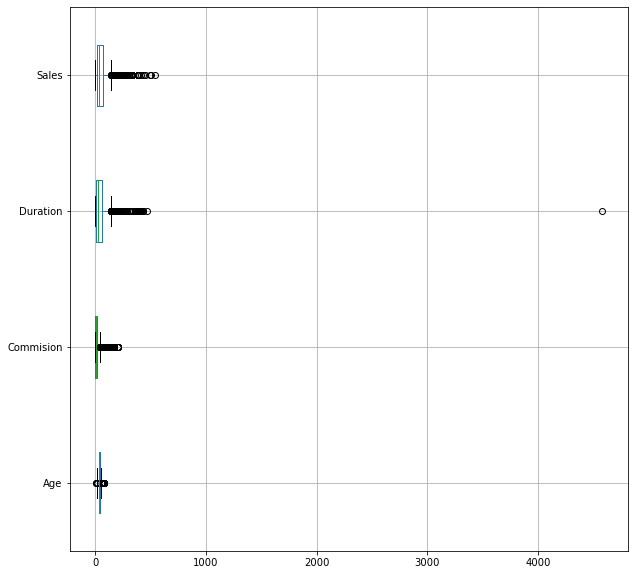

In [11]:
# Checking for outliers:

plt.figure(figsize=(10,10))
data[['Age','Commision','Duration','Sales']].boxplot(vert=0)

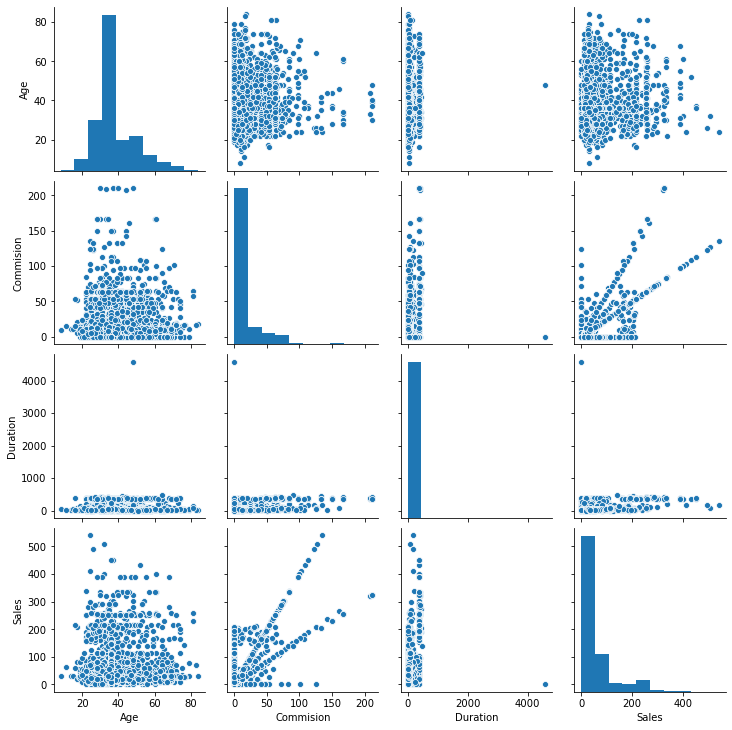

In [12]:
# Checking the pairwise distribution of cntinuous variables:

sns.pairplot(data[['Age','Commision','Duration','Sales']])

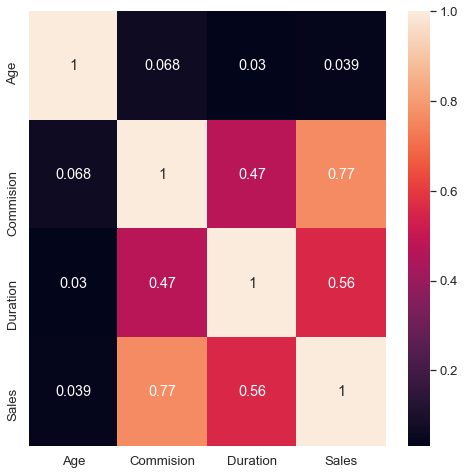

In [15]:
#Checking for correlation using heatmap:

plt.figure(figsize=(8,8))
sns.set(font_scale=1.2)
sns.heatmap(data[['Age','Commision','Duration','Sales']].corr(), annot=True)

In [16]:
#Converting object type variables to categorical codes to enable processing:

for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('Feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



Feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


Feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


Feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


Feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


Feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


Feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [17]:
#Cross-checking the datatypes again:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [18]:
#Checking the data again:

data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [19]:
#Checking the proportion of the distribution of the target variable:

data.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [20]:
#Extracting the target column to ceate separate vectors for splitting data:

x = data.drop("Claimed", axis=1)

y = data.pop("Claimed")

x.head()



,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [21]:
#Splitting the data into Training & Testing sets:

from sklearn.model_selection import train_test_split

x_train, x_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)

In [22]:
#checking the dimensions of the two sets:

print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

x_train (2100, 9)
x_test (900, 9)
train_labels (2100,)
test_labels (900,)


In [23]:
#Building a Decision Tree Classifier:

param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [24]:
#Fitting the training data:

grid_search.fit(x_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [25]:
#Generating the decision tree:

train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [26]:
#Genrating the decision tree on the site http://webgraphviz.com/

In [27]:
#Understanding the variable importance:

print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.599363
Sales         0.255785
Product Name  0.056555
Duration      0.037945
Age           0.030261
Commision     0.012676
Type          0.007416
Channel       0.000000
Destination   0.000000


In [28]:
#Predicting on training and test data:

ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [29]:
#Getting the predicted classes and probabilities:

ytest_predict
ytest_predict_prob=best_grid.predict_proba(x_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.935714,0.064286
1,0.529412,0.470588
2,0.358621,0.641379
3,0.234783,0.765217
4,0.924242,0.075758


AUC: 0.836


Text(0.5, 1.0, 'ROC Curve - Training data')

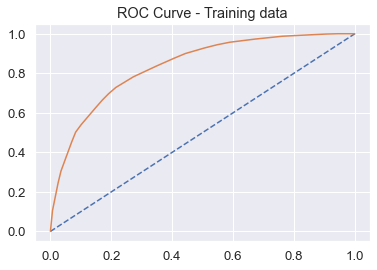

In [43]:
#Evaluating the model using AUC, ROC- for training data:

# predicting probabilities:
probs = best_grid.predict_proba(x_train)

# keeping the probabilities for the positive outcome (1) only:
probs = probs[:, 1]

# calculating AUC:
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)

# calculating the ROC curve:
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plotting the roc curve for the model:
plt.plot(cart_train_fpr, cart_train_tpr)
plt.title("ROC Curve - Training data")


AUC: 0.794


Text(0.5, 1.0, 'ROC Curve - Testing data')

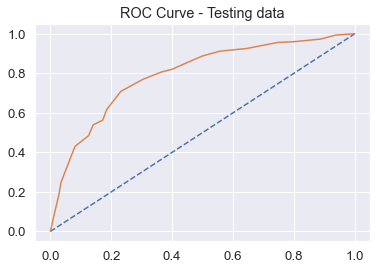

In [44]:
#Evaluating the model using AUC, ROC- for testing data:

# predicting probabilities:
probs = best_grid.predict_proba(x_test)

# keeping probabilities for the positive outcome (1) only:
probs = probs[:, 1]

# calculating AUC:
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)

# calculating roc curve:
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plotting the roc curve for the model:
plt.plot(cart_test_fpr, cart_test_tpr)
plt.title("ROC Curve - Testing data")

In [32]:
#Building confusionmatrix for the training data:

confusion_matrix(train_labels, ytrain_predict)

array([[1349,  122],
       [ 313,  316]])

In [33]:
#calculating Train Data Accuracy:
cart_train_acc=best_grid.score(x_train,train_labels) 
cart_train_acc

0.7928571428571428

In [34]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1471
           1       0.72      0.50      0.59       629

    accuracy                           0.79      2100
   macro avg       0.77      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



In [35]:
#Storing the matrices for future comparison:

cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.72
cart_train_recall  0.5
cart_train_f1  0.59


In [36]:
#Building confusion matrix for the testing data:

confusion_matrix(test_labels, ytest_predict)

array([[564,  41],
       [183, 112]])

In [37]:
#Calculating Test Data Accuracy:

cart_test_acc=best_grid.score(x_test,test_labels)
cart_test_acc

0.7511111111111111

In [38]:
#Printing classification report for test data:

print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       605
           1       0.73      0.38      0.50       295

    accuracy                           0.75       900
   macro avg       0.74      0.66      0.67       900
weighted avg       0.75      0.75      0.72       900



In [39]:
#Storing the matrices for future comparison:

cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.73
cart_test_recall  0.38
cart_test_f1  0.5


In [45]:
#CART conslusions:

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
cart = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1]},index=index)
round(cart,2)

,CART Train,CART Test
Accuracy,0.79,0.75
AUC,0.84,0.79
Recall,0.50,0.38
Precision,0.72,0.73
F1 Score,0.59,0.50


In [46]:
#Building a Random forest classifier:

param_grid = {
    'max_depth': [20],## 20,30,40
    'max_features': [8],## 7,8,9
    'min_samples_leaf': [50],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [100] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [47]:
#Fitting the model to training data:

grid_search.fit(x_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [20], 'max_features': [8],
                         'min_samples_leaf': [50], 'min_samples_split': [50],
                         'n_estimators': [100]})

In [48]:
#finding the best parameters:

grid_search.best_params_

{'max_depth': 20,
 'max_features': 8,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 100}

In [49]:
best_grid = grid_search.best_estimator_

In [50]:
best_grid

RandomForestClassifier(max_depth=20, max_features=8, min_samples_leaf=50,
                       min_samples_split=50, random_state=1)

In [51]:
#Predicting the Train and test data:

ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [52]:
#Model evaluation on training data:

confusion_matrix(train_labels,ytrain_predict)

array([[1328,  143],
       [ 277,  352]])

In [53]:
#Training data accuracy:

rf_train_acc=best_grid.score(x_train,train_labels) 
rf_train_acc

0.8

In [54]:
#Printing classiication reportfor training data:

print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1471
           1       0.71      0.56      0.63       629

    accuracy                           0.80      2100
   macro avg       0.77      0.73      0.74      2100
weighted avg       0.79      0.80      0.79      2100



In [64]:
#Storing metrices for future comparison:

rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.71
rf_train_recall  0.56
rf_train_f1  0.63


Area under Curve is 0.8400485701841323


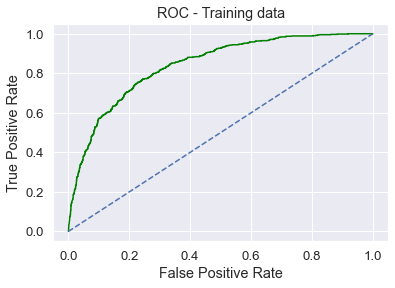

In [69]:
#Calculating AUC for training data:

rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Training data')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(x_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [57]:
#Model evaluation on testing data:

confusion_matrix(test_labels,ytest_predict)

array([[556,  49],
       [163, 132]])

In [58]:
#Testing data accuracy:

rf_test_acc=best_grid.score(x_test,test_labels)
rf_test_acc

0.7644444444444445

In [59]:
#Printing classification report for testing data:

print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.73      0.45      0.55       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.70       900
weighted avg       0.76      0.76      0.75       900



In [65]:
#Storing metrices for future comparison:

rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.73
rf_test_recall  0.45
rf_test_f1  0.55


Area under Curve is 0.8168623056450484


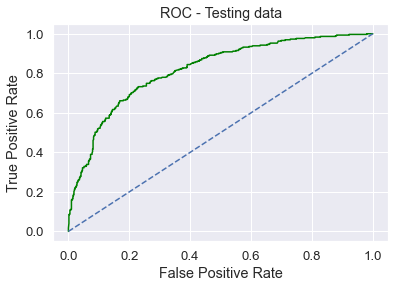

In [70]:
#calculating AUC for testing data:

rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Testing data')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(x_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [62]:
#Finding the variable importance:

random=(pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))
print(random)

                   Imp
Agency_Code   0.529208
Sales         0.205338
Product Name  0.132938
Commision     0.052595
Duration      0.040586
Age           0.030295
Type          0.006890
Destination   0.002149
Channel       0.000000


In [68]:
#RF conslusions:

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
rf = pd.DataFrame({'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1]},index=index)
round(rf,2)

,RF Train,RF Test
Accuracy,0.80,0.76
AUC,0.84,0.82
Recall,0.56,0.45
Precision,0.71,0.73
F1 Score,0.63,0.55


In [71]:
#Building a Neural Network classifier:

param_grid = {
    'hidden_layer_sizes': [50,100],
    'max_iter': [2500,3000], 
    'solver': ['adam','sgd'], 
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [72]:
grid_search.fit(x_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [73]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

In [74]:
#Predicting the training and testing data:

ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [75]:
#Model evaluation on training data:

confusion_matrix(train_labels,ytrain_predict)

array([[1289,  182],
       [ 262,  367]])

In [76]:
#Training data accuracy:

nn_train_acc=best_grid.score(x_train,train_labels) 
nn_train_acc

0.7885714285714286

In [77]:
#Printing classification report:

print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.58      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



In [78]:
#Storing values for future comparison:

nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.58
nn_train_f1  0.62


Area under Curve is 0.8158261632688794


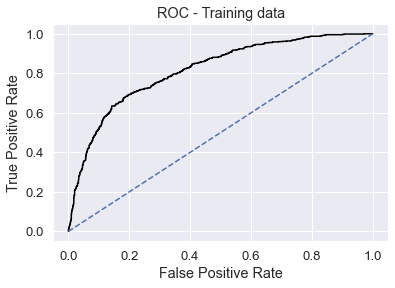

In [79]:
#Finding AUC:

nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(x_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Training data')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(x_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [80]:
#Model evaluaton on testing data:

confusion_matrix(test_labels,ytest_predict)

array([[547,  58],
       [154, 141]])

In [81]:
#Testing data accuracy:

nn_test_acc=best_grid.score(x_test,test_labels)
nn_test_acc

0.7644444444444445

In [82]:
#Classification report for testing data:

print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       605
           1       0.71      0.48      0.57       295

    accuracy                           0.76       900
   macro avg       0.74      0.69      0.70       900
weighted avg       0.76      0.76      0.75       900



In [83]:
#Storing values for future comparison:

nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.71
nn_test_recall  0.48
nn_test_f1  0.57


Area under Curve is 0.7827903067656534


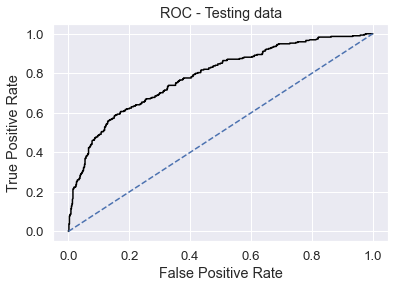

In [84]:
#Evaluating AUC:

nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(x_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Testing data')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(x_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [85]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)>

In [86]:
#NN conclusions:

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
nn = pd.DataFrame({'NN Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'NN Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(nn,2)

,NN Train,NN Test
Accuracy,0.79,0.76
AUC,0.82,0.78
Recall,0.58,0.48
Precision,0.67,0.71
F1 Score,0.62,0.57


In [87]:
#Comparing metrices of all 3 models:

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
final = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(final,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.75,0.80,0.76,0.79,0.76
AUC,0.84,0.79,0.84,0.82,0.82,0.78
Recall,0.50,0.38,0.56,0.45,0.58,0.48
Precision,0.72,0.73,0.71,0.73,0.67,0.71
F1 Score,0.59,0.50,0.63,0.55,0.62,0.57


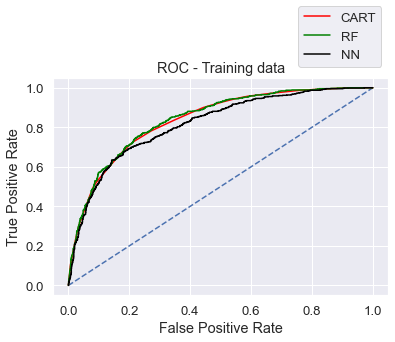

In [88]:
#Plotting ROC curves for all 3 models - Training data:

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Training data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

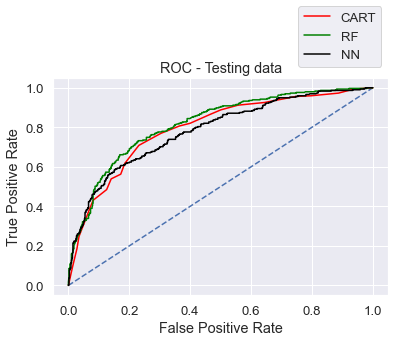

In [89]:
#Plotting ROC curves for all 3 models - Testing data:

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Testing data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [ ]:
#Random Forest seems to be the best model based on the metrics calculated. The ROC curves also validate the same.